## 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기</br>
<img src="![image.png](attachment:a17c9f24-9ff4-4215-a30c-bc34cea3988f.png)" width=200>

In [4]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년 1월).csv"
data = pd.read_csv(file_path, encoding="EUC-KR")
data.head() # 맨앞 데이터 5개 가져오기
# data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [30]:
columns = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns + time_col + [ '24~1H' ]
data.columns = columns
data = data.loc[:,:'total']
data.head()
# data.tail()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [31]:
data1 = data.groupby(['num','name','date']).sum().reset_index()
# data1 = [data1['date']=='2025-01-01']
data1

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [36]:
gdata = data1[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
# ascending=True / 오름차순 정리
gdata.head(10)

,name,date,total
1860,가야,2025-01-01,3953
1861,가야,2025-01-02,7242
1862,가야,2025-01-03,7293
1863,가야,2025-01-04,5609
1864,가야,2025-01-05,3945
1865,가야,2025-01-06,7469
1866,가야,2025-01-07,7217
1867,가야,2025-01-08,7324
1868,가야,2025-01-09,7110
1869,가야,2025-01-10,7052


In [38]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [67]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata = sdata.head(20)

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [69]:
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [70]:
# !pip install squarify

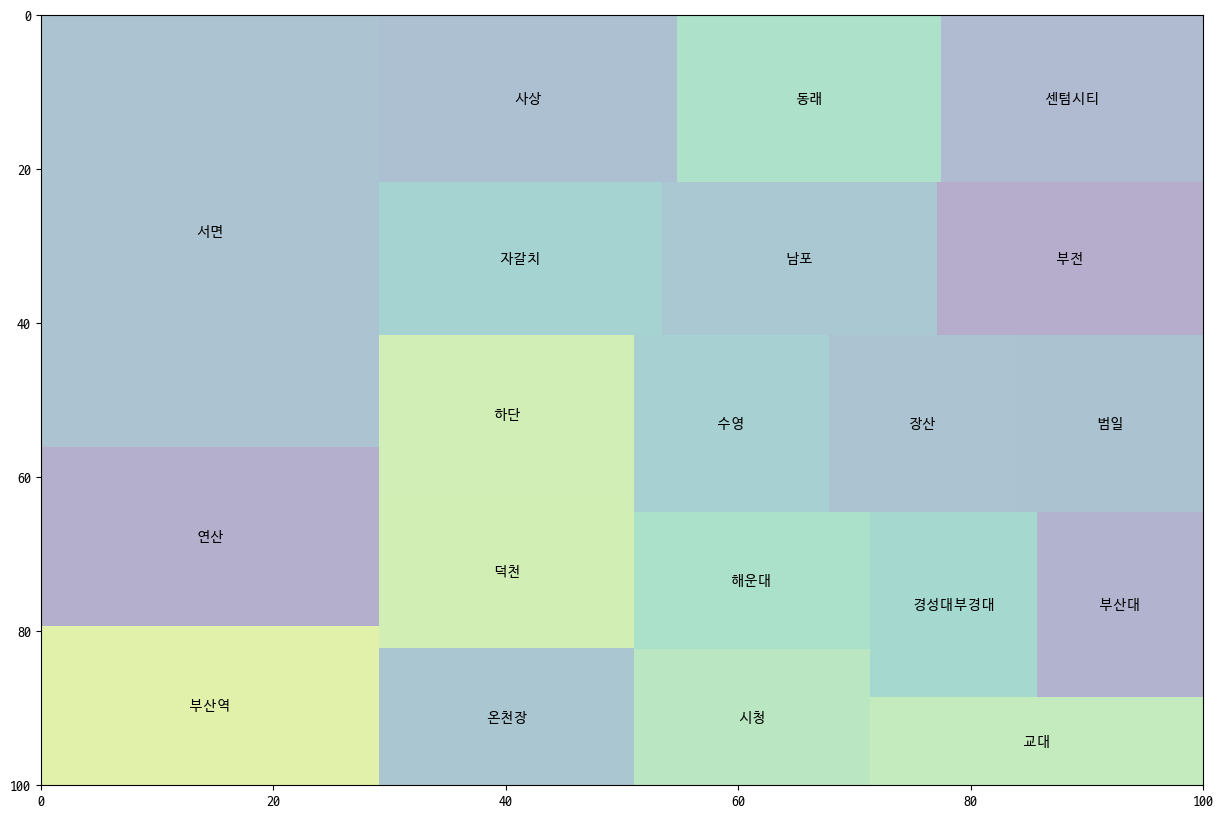

In [75]:
import squarify
plt.figure(figsize=(15,10))
squarify.plot(sizes=sdata['total'], label=sdata.name, alpha=0.4)
plt.rcParams['font.size']=10
# plt.rcParams['text.color']="black"
plt.gca().invert_yaxis()
plt.show()